In [9]:
# import section
import datetime

import importlib
import EDA
importlib.reload(EDA)

import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

000000000000000000TEST


Numer of null values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Data types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Number of duplicate rows:  (3854, 9)


Number of unique values in each column:

gender: 2 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values
             age  hypertension  he

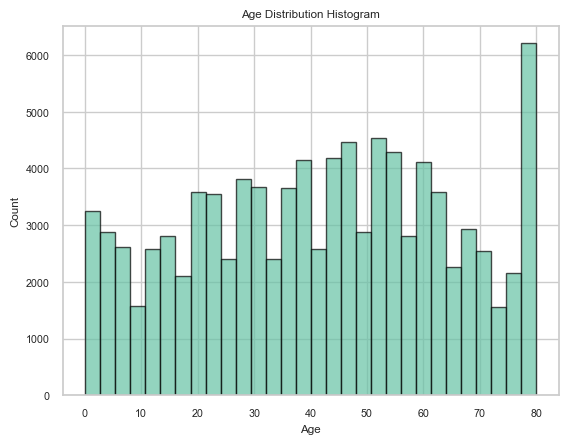

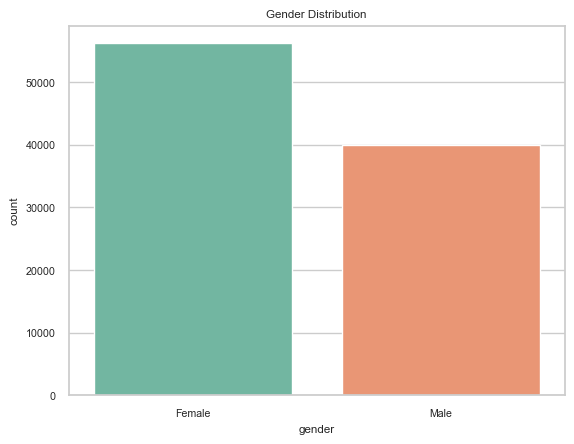

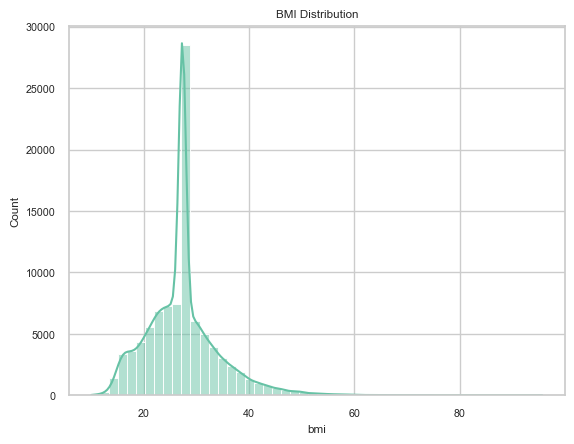

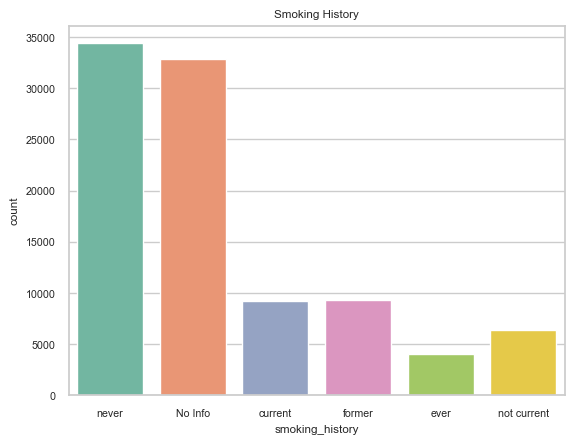

smoking_history
non-smoker     70902
past_smoker    19794
current         9286
Name: count, dtype: int64

<<<<<<df1 head>>>>>

      age  hypertension  heart_disease     bmi  HbA1c_level  \
0 80.0000             0              1 25.1900       6.6000   
1 54.0000             0              0 27.3200       6.6000   
2 28.0000             0              0 27.3200       5.7000   
3 36.0000             0              0 23.4500       5.0000   
4 76.0000             1              1 20.1400       4.8000   

   blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                  140         0           True        False   
1                   80         0           True        False   
2                  158         0          False         True   
3                  155         0           True        False   
4                  155         0          False         True   

   smoking_history_current  smoking_history_non-smoker  \
0                    False                        T

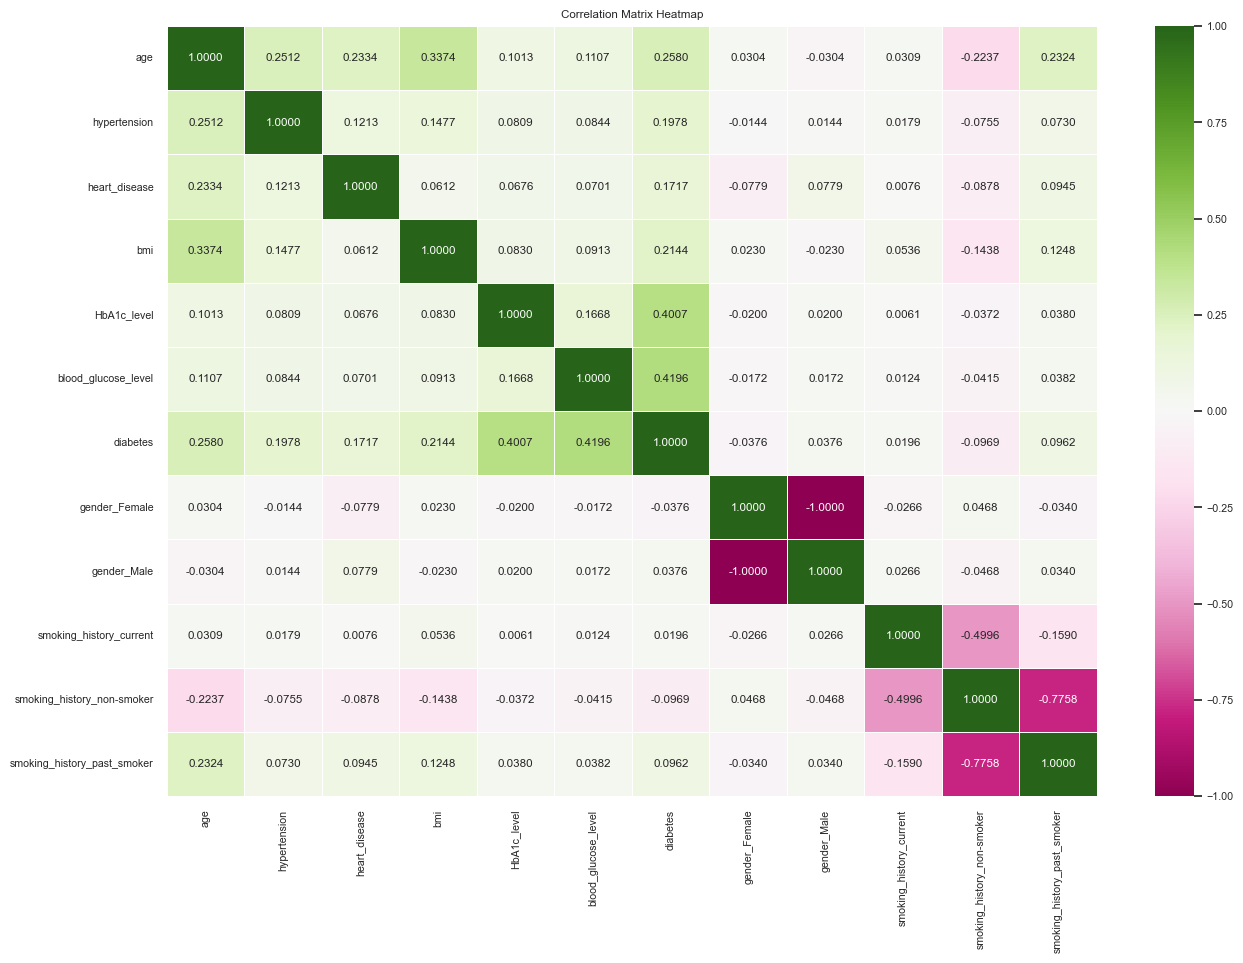

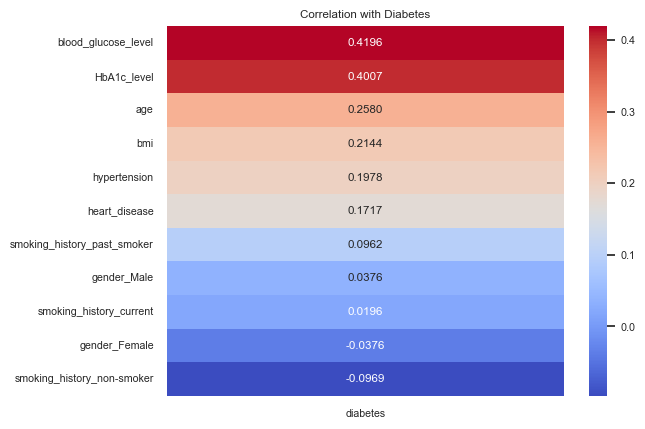

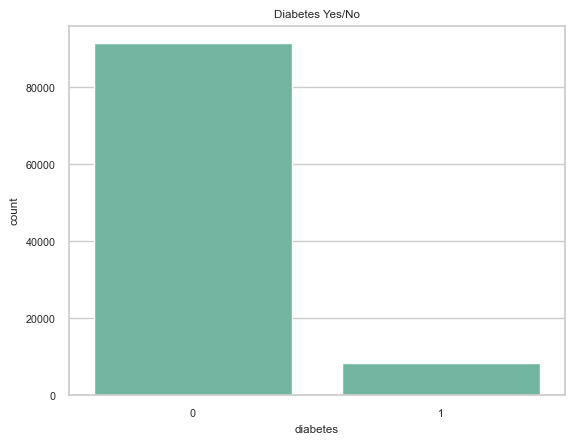

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


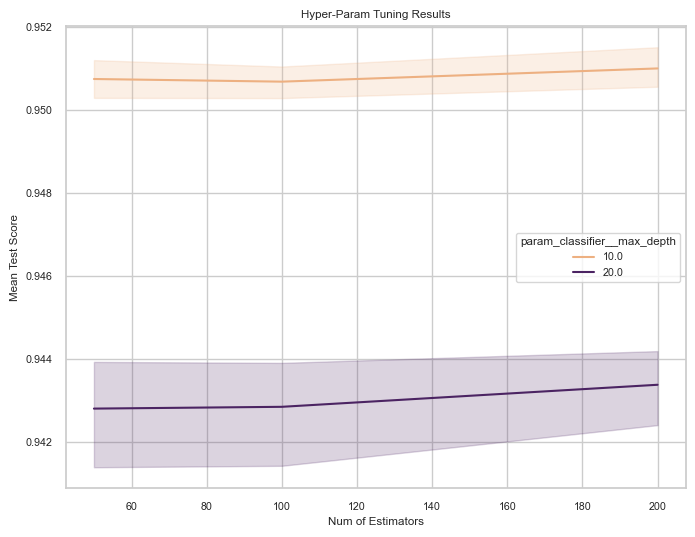

Model Accuracy:  0.9503925588838326
Classification Report RF:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     18222
           1       0.69      0.81      0.74      1775

    accuracy                           0.95     19997
   macro avg       0.83      0.89      0.86     19997
weighted avg       0.96      0.95      0.95     19997



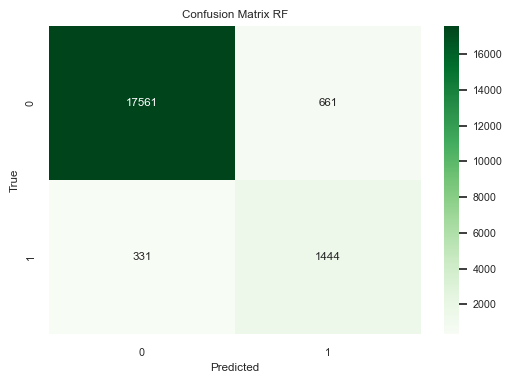

                        Feature  Importance
2                   HbA1c_level      0.4410
3           blood_glucose_level      0.3150
0                           age      0.1161
1                           BMI      0.0647
4                  hypertension      0.0350
5                 heart_disease      0.0165
9    smoking_history_non-smoker      0.0049
10  smoking_history_past_smoker      0.0032
7                   gender_Male      0.0014
6                 gender_Female      0.0013
8       smoking_history_current      0.0009


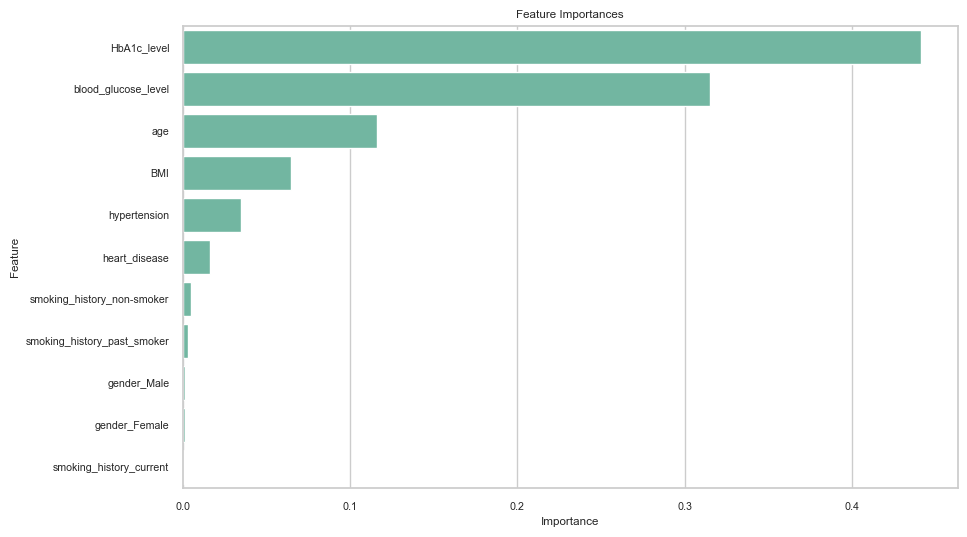


\<<<<<<<<<Logical Regression>>>>>>>>


===== Logistic Regression Evaluation =====
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Confusion Matrix LR:
 [[18093   129]
 [  691  1084]]
Accuracy: 0.9589938490773616
Classification Report LR:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.89      0.61      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.93      0.80      0.85     19997
weighted avg       0.96      0.96      0.96     19997



In [10]:
def main():
    df = pd.read_csv(r"C:\Users\user0\Documents\BPP\DSPD\Summative\DS\DiabetesDS.csv")
    # Remove Unneccessary value
    df = df[df['gender'].isin(['Male', 'Female'])]

    EDA.analyse_data(df, "diabetes")

    # Apply the function to the 'smoking_history' column
    df['smoking_history'] = df['smoking_history'].apply(EDA.smoking_categories)
    # Check the new value counts
    print(df['smoking_history'].value_counts())

    df1 = df.copy()
    # Perform one-hot encoding on the gender and smoking_history variable
    df1 = EDA.one_hot_encoding(df1, 'gender')
    df1 = EDA.one_hot_encoding(df1, 'smoking_history')

    # check the up to date version of the dataframe
    print("\n<<<<<<df1 head>>>>>\n")
    print(df1.head()) 

    # Visualize the correlation matrix    
    EDA.cor_matrix(df1)
    
    # Visualize graphics
    # 1 - 'diabetes' variable - the DS is imbalanced towards negative diabetes
    EDA.graphics(df1)

    # as the dataset is imbalanced, we will use SMOTE and RandomUnderSampler to address it
    over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)
    
    # Preprocessing [good practice]
    # z-score normalization for the numerical variables
    # one-hot encoding for the categorical variables
    pre_process = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
            ('cat', OneHotEncoder(), ['gender','smoking_history'])
        ])

    # preprocessing, resampling (to handle class imbalance), and a classifier into a single workflow
    # preprocessing, resampling, and modeling 
    clf = imbPipeline(steps=[('preprocessor', pre_process),
                    ('over', over),
                    ('under', under),
                    ('classifier', RandomForestClassifier())])
    
    # Hyperparameter grid definition (with default values)
    parameter_grid = {
        'classifier__n_estimators':     [50, 100, 200],
        'classifier__max_depth':        [None, 10, 20],
        'classifier__min_samples_split':[2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
    # Grid Search object
    grid_search = GridSearchCV(clf, parameter_grid, cv=5)

    # Split data into features and target variable
    # Split into train and test sets
    X = df.drop('diabetes', axis=1) # Drop the target column (diabetes) from the DataFrame
    y = df['diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # remove the below comment to train the model
    
    # Train the model and save the resulting model to a file for later use and to avoid retraining to save time
    # grid_search.fit(X_train, y_train)
    # joblib.dump(grid_search, r"C:\Users\user0\Documents\BPP\DSPD\Summative\code\BPP_DSPD\grid_search_rf.pkl")
    
    # Load the model from the file / comment the below line to train the model
    grid_search = joblib.load(r"C:\Users\user0\Documents\BPP\DSPD\Summative\code\BPP_DSPD\grid_search_rf.pkl")

    # Best parameters: 
    print("Best Parameters: ", grid_search.best_params_)

    # GridSearchCV to a DataFrame and visualize the results
    rslt_df = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=rslt_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='flare')
    plt.title('Hyper-Param Tuning Results')
    plt.xlabel('Num of Estimators')
    plt.ylabel('Mean Test Score')
    plt.show()

    # Use the best model
    y_pred = grid_search.predict(X_test)

    # Evaluate
    print("Model Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification Report RF:\n", classification_report(y_test, y_pred))

    # Visualise the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix RF')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Input feature names
    onehotenc_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

    # Add numeric feature names
    feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehotenc_columns

    # Feature importances
    importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

    # df for feature importance
    ft_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # descending sort
    ft_importance_df = ft_importance_df.sort_values('Importance', ascending=False)

    # Visualize the feature importances
    print(ft_importance_df)

    # Graphical ilustration of the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=ft_importance_df)
    plt.title('Feature Importances')
    plt.show()
######################################################################
    print("\n\<<<<<<<<<Logical Regression>>>>>>>>\n\n")
    # Split data into features and target variable
    #print(df1.head(10))
    EDA.LogReg(df1, X_train, X_test, y_train, y_test, target_col='diabetes') 









if __name__ == "__main__":
    main()
